# Kapitel 7: Neuronale Netzwerke - Grundlagen

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
from distutils.version import StrictVersion

In [6]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

1.0


In [10]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

In [11]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

2.7.0


In [12]:
import pandas as pd
print(pd.__version__)

assert StrictVersion(pd.__version__) >= StrictVersion('0.20.0')

1.3.4


## Iris mit Neuronalen Netzwerken

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

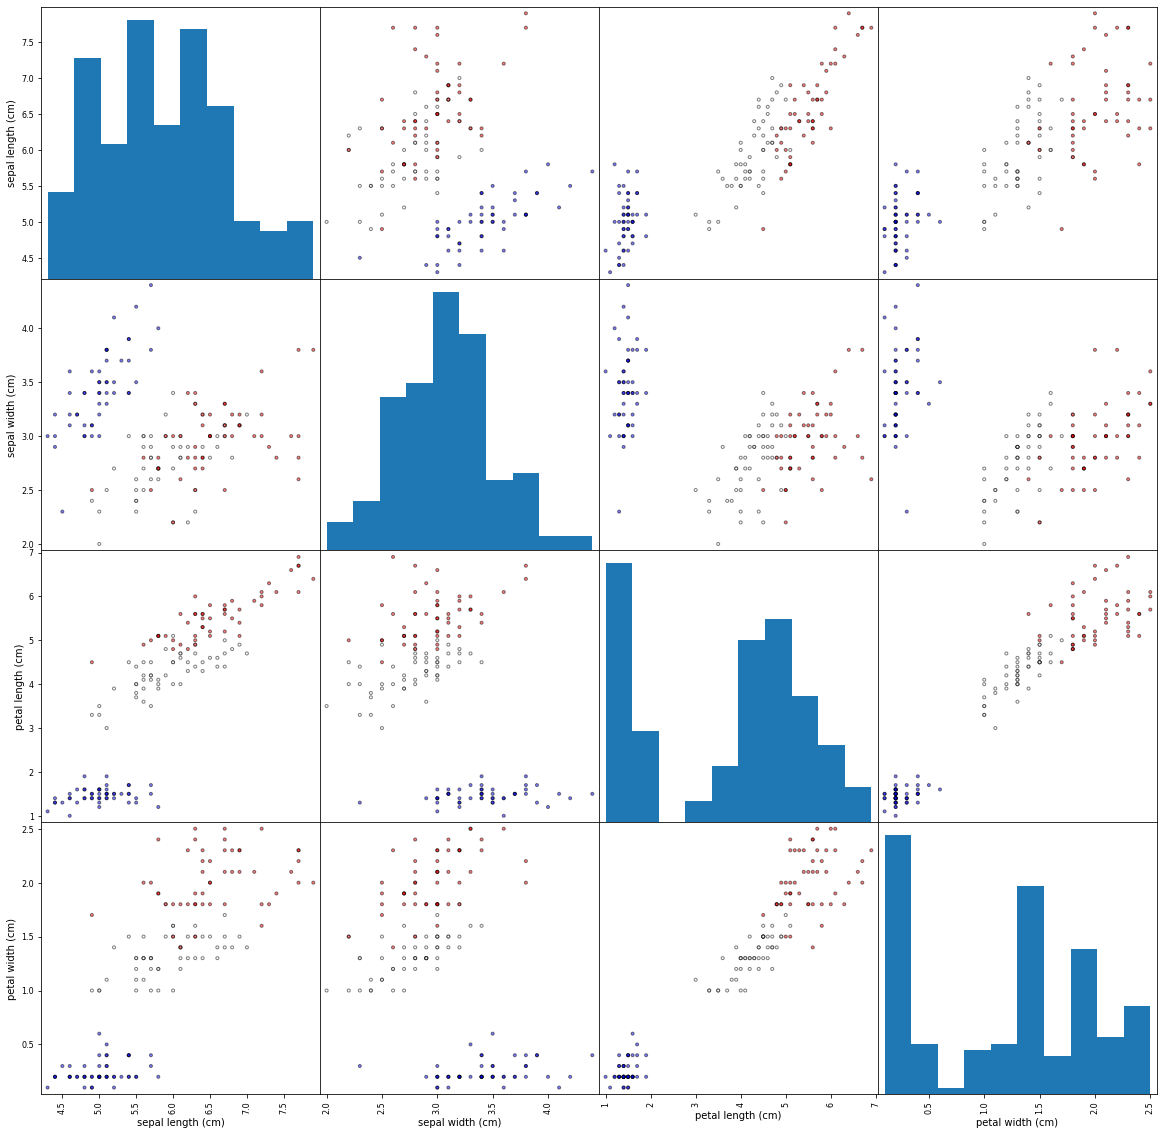

In [15]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolor='black', figsize=(20, 20))

In [16]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Das künstliche Neuron

In [17]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sum

In [18]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [19]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [20]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#### Step Function: abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [21]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

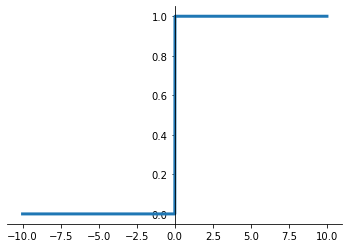

In [22]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [23]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

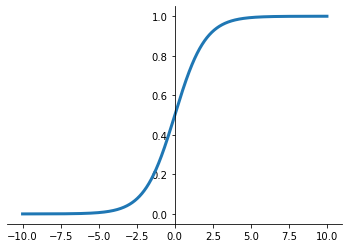

In [24]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

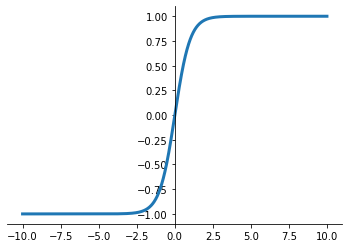

In [25]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [26]:
def np_relu(x):
    return np.maximum(0, x)

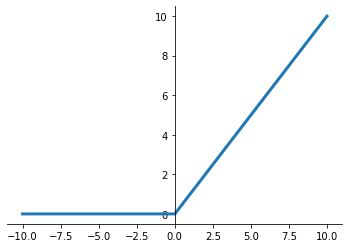

In [27]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

In [28]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [29]:
neuron(5.1, 3.5)

3.043155690056538e-05

In [30]:
# Version that takes as many values as you like
weights_with_bias = np.array([3, -4, 2])
def np_neuron(X):
    inputs_with_1_for_bias = np.concatenate((np.array([1]), X))
    return np_sigmoid(np.sum(inputs_with_1_for_bias*weights_with_bias));

In [31]:
np_neuron(np.array([5.1, 3.5]))

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras

In [32]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [33]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [37]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[4.07934  , 3.4646573, 0.7005446]], dtype=float32)

In [45]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(inputs=inputs, outputs=predictions)

In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 15        
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[0.5721356 , 0.37095767, 0.05690676]], dtype=float32)

# Training

In [49]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [50]:
y[100]

2

In [51]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [52]:
y[100]

array([0., 0., 1.], dtype=float32)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [55]:
# !rm -r tf_log

# https://keras.io/callbacks/#tensorboard
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [56]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Epoch 1/500
3/3 [==============================] - 0s 54ms/step - loss: 1.2620 - accuracy: 0.6667 - val_loss: 1.2316 - val_accuracy: 0.6667
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 1.2238 - accuracy: 0.6667 - val_loss: 1.1939 - val_accuracy: 0.6667
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 1.1842 - accuracy: 0.6667 - val_loss: 1.1570 - val_accuracy: 0.6667
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 1.1504 - accuracy: 0.6667 - val_loss: 1.1215 - val_accuracy: 0.6667
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 1.1111 - accuracy: 0.6667 - val_loss: 1.0887 - val_accuracy: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0788 - accuracy: 0.6667 - val_loss: 1.0576 - val_accuracy: 0.6667
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 1.0474 - accuracy: 0.6667 - val_loss: 1.0287 - val_accuracy: 0.6667
Epoch 8/500
3/3 [=========

3/3 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.7143 - val_loss: 0.7200 - val_accuracy: 0.7222
Epoch 60/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6878 - accuracy: 0.7143 - val_loss: 0.7168 - val_accuracy: 0.7222
Epoch 61/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6846 - accuracy: 0.7143 - val_loss: 0.7137 - val_accuracy: 0.7222
Epoch 62/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6812 - accuracy: 0.7143 - val_loss: 0.7106 - val_accuracy: 0.7222
Epoch 63/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6779 - accuracy: 0.7262 - val_loss: 0.7075 - val_accuracy: 0.7222
Epoch 64/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6747 - accuracy: 0.7262 - val_loss: 0.7043 - val_accuracy: 0.7222
Epoch 65/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.7262 - val_loss: 0.7012 - val_accuracy: 0.7222
Epoch 66/500
3/3 [===============

3/3 [==============================] - 0s 9ms/step - loss: 0.5406 - accuracy: 0.7381 - val_loss: 0.5701 - val_accuracy: 0.7778
Epoch 118/500
3/3 [==============================] - 0s 8ms/step - loss: 0.5388 - accuracy: 0.7381 - val_loss: 0.5680 - val_accuracy: 0.7778
Epoch 119/500
3/3 [==============================] - 0s 8ms/step - loss: 0.5370 - accuracy: 0.7500 - val_loss: 0.5659 - val_accuracy: 0.7778
Epoch 120/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5350 - accuracy: 0.7500 - val_loss: 0.5639 - val_accuracy: 0.7778
Epoch 121/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5332 - accuracy: 0.7500 - val_loss: 0.5620 - val_accuracy: 0.7778
Epoch 122/500
3/3 [==============================] - 0s 8ms/step - loss: 0.5315 - accuracy: 0.7500 - val_loss: 0.5600 - val_accuracy: 0.7778
Epoch 123/500
3/3 [==============================] - 0s 8ms/step - loss: 0.5295 - accuracy: 0.7500 - val_loss: 0.5581 - val_accuracy: 0.7778
Epoch 124/500
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.4561 - accuracy: 0.8571 - val_loss: 0.4774 - val_accuracy: 0.8611
Epoch 176/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4550 - accuracy: 0.8571 - val_loss: 0.4761 - val_accuracy: 0.8611
Epoch 177/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4537 - accuracy: 0.8571 - val_loss: 0.4748 - val_accuracy: 0.8611
Epoch 178/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4526 - accuracy: 0.8571 - val_loss: 0.4736 - val_accuracy: 0.8611
Epoch 179/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4517 - accuracy: 0.8571 - val_loss: 0.4723 - val_accuracy: 0.8611
Epoch 180/500
3/3 [==============================] - 0s 9ms/step - loss: 0.4505 - accuracy: 0.8571 - val_loss: 0.4709 - val_accuracy: 0.8611
Epoch 181/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4492 - accuracy: 0.8690 - val_loss: 0.4695 - val_accuracy: 0.8611
Epoch 182/500
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.3980 - accuracy: 0.9167 - val_loss: 0.4093 - val_accuracy: 0.9444
Epoch 234/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3972 - accuracy: 0.9167 - val_loss: 0.4082 - val_accuracy: 0.9444
Epoch 235/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3963 - accuracy: 0.9167 - val_loss: 0.4072 - val_accuracy: 0.9444
Epoch 236/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3955 - accuracy: 0.9167 - val_loss: 0.4061 - val_accuracy: 0.9444
Epoch 237/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3946 - accuracy: 0.9167 - val_loss: 0.4052 - val_accuracy: 0.9444
Epoch 238/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3936 - accuracy: 0.9167 - val_loss: 0.4042 - val_accuracy: 0.9444
Epoch 239/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3927 - accuracy: 0.9167 - val_loss: 0.4031 - val_accuracy: 0.9444
Epoch 240/500
3/3 [======

3/3 [==============================] - 0s 9ms/step - loss: 0.3500 - accuracy: 0.9286 - val_loss: 0.3509 - val_accuracy: 0.9722
Epoch 292/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3497 - accuracy: 0.9286 - val_loss: 0.3501 - val_accuracy: 0.9722
Epoch 293/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3485 - accuracy: 0.9286 - val_loss: 0.3491 - val_accuracy: 0.9722
Epoch 294/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3478 - accuracy: 0.9286 - val_loss: 0.3481 - val_accuracy: 0.9722
Epoch 295/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3471 - accuracy: 0.9286 - val_loss: 0.3471 - val_accuracy: 0.9722
Epoch 296/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3462 - accuracy: 0.9286 - val_loss: 0.3462 - val_accuracy: 0.9722
Epoch 297/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3455 - accuracy: 0.9286 - val_loss: 0.3453 - val_accuracy: 0.9722
Epoch 298/500
3/3 [========

3/3 [==============================] - 0s 9ms/step - loss: 0.3074 - accuracy: 0.9643 - val_loss: 0.2984 - val_accuracy: 0.9722
Epoch 350/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3067 - accuracy: 0.9643 - val_loss: 0.2975 - val_accuracy: 0.9722
Epoch 351/500
3/3 [==============================] - 0s 8ms/step - loss: 0.3060 - accuracy: 0.9643 - val_loss: 0.2966 - val_accuracy: 0.9722
Epoch 352/500
3/3 [==============================] - 0s 9ms/step - loss: 0.3053 - accuracy: 0.9643 - val_loss: 0.2958 - val_accuracy: 0.9722
Epoch 353/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3048 - accuracy: 0.9643 - val_loss: 0.2950 - val_accuracy: 0.9722
Epoch 354/500
3/3 [==============================] - 0s 11ms/step - loss: 0.3039 - accuracy: 0.9643 - val_loss: 0.2941 - val_accuracy: 0.9722
Epoch 355/500
3/3 [==============================] - 0s 10ms/step - loss: 0.3034 - accuracy: 0.9643 - val_loss: 0.2933 - val_accuracy: 0.9722
Epoch 356/500
3/3 [=====

3/3 [==============================] - 0s 10ms/step - loss: 0.2692 - accuracy: 0.9643 - val_loss: 0.2517 - val_accuracy: 1.0000
Epoch 408/500
3/3 [==============================] - 0s 10ms/step - loss: 0.2683 - accuracy: 0.9643 - val_loss: 0.2509 - val_accuracy: 1.0000
Epoch 409/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2677 - accuracy: 0.9643 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 410/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2672 - accuracy: 0.9643 - val_loss: 0.2493 - val_accuracy: 1.0000
Epoch 411/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2670 - accuracy: 0.9643 - val_loss: 0.2486 - val_accuracy: 0.9722
Epoch 412/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2661 - accuracy: 0.9643 - val_loss: 0.2479 - val_accuracy: 0.9722
Epoch 413/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2656 - accuracy: 0.9643 - val_loss: 0.2472 - val_accuracy: 0.9722
Epoch 414/500
3/3 [======

3/3 [==============================] - 0s 8ms/step - loss: 0.2356 - accuracy: 0.9643 - val_loss: 0.2118 - val_accuracy: 1.0000
Epoch 466/500
3/3 [==============================] - 0s 8ms/step - loss: 0.2352 - accuracy: 0.9643 - val_loss: 0.2115 - val_accuracy: 1.0000
Epoch 467/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2347 - accuracy: 0.9643 - val_loss: 0.2112 - val_accuracy: 1.0000
Epoch 468/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2345 - accuracy: 0.9643 - val_loss: 0.2109 - val_accuracy: 1.0000
Epoch 469/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2340 - accuracy: 0.9643 - val_loss: 0.2103 - val_accuracy: 1.0000
Epoch 470/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2335 - accuracy: 0.9643 - val_loss: 0.2097 - val_accuracy: 1.0000
Epoch 471/500
3/3 [==============================] - 0s 9ms/step - loss: 0.2329 - accuracy: 0.9643 - val_loss: 0.2088 - val_accuracy: 1.0000
Epoch 472/500
3/3 [========

# Bewertung

In [57]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[9.8455542e-01, 1.5442208e-02, 2.3946138e-06]], dtype=float32)

In [58]:
X[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), array([1., 0., 0.], dtype=float32))

In [59]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9750


(0.2097375988960266, 0.9750000238418579)

In [60]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 [==============================] - 0s 14ms/step - loss: 0.1936 - accuracy: 1.0000


(0.19359956681728363, 1.0)